In [98]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import numpy as np

<div dir="rtl" lang="fa">
ابتدا با استفاده از تابع make blobs یک دیتاست دو بعدی تولید می کنیم
دیتاست تولید شده دو کلاس دارد. لیبل کلاس ها را ۱ و ۱- قرار می دهیم و دیتاست را نمایش می دهیم
</div>


In [68]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2)
Y = np.where(Y == 0, -1, 1)

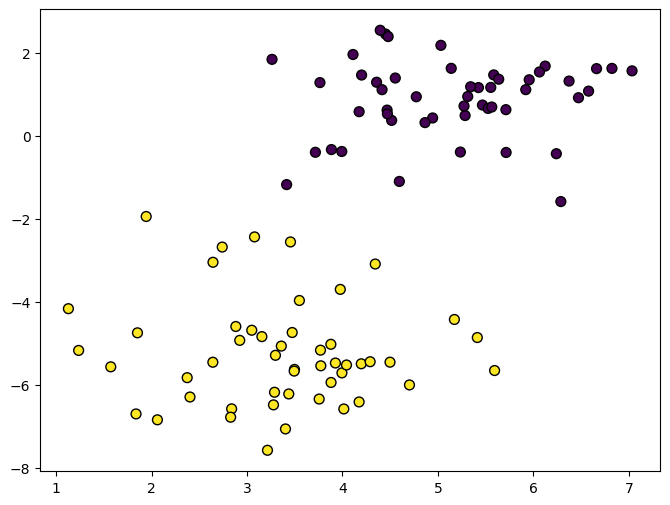

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)

<div dir="rtl" lang="fa">
در ادامه متود های خواسته شده در پروژه را پیاده سازی می کنیم. فرمول پرسپترون به صورت زیر می باشد
</div>

$$
\mathbf{w}^T\mathbf{x} + b
$$

<div dir="rtl" lang="fa">
بعلاوه برای آپدیت وزن های مدل از فرمول زیر استفاده می کنیم
</div>

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} + y \mathbf{x}
$$
$$
\mathbf{b}_{\text{new}} = \mathbf{b}_{\text{old}} + y \mathbf{x}
$$

<div dir="rtl" lang="fa">
فرمول آپدیت وابسته به کلاس طبقه بندی شده توسط پرسپترون می باشد که می تواند ۱+ یا ۱- باشد.
توجه کنید که ما تنها زمانی وزن ها را آپدیت می کنیم که یک داده درست طبقه بندی نشده باشد.
</div>


In [15]:
class F:
  @staticmethod
  def sign(x):
    return 1 if x >= 0 else -1

In [104]:
class Perceptron:
  def __init__(self, input_dimension):
    self.weights = np.random.rand(input_dimension)
    self.bias = 0
  def forward(self, input):
    return F.sign(self.weights.T @ input + self.bias)

In [105]:
class Optimizer:
  def __init__(self, model):
    self.model = model

  def update(self, x, y, y_hat):
    if y != y_hat:
      self.model.weights = self.model.weights + y * x
      self.model.bias = self.model.bias + y * 1

In [108]:
def train(X, Y, n_iter=100):

  model = Perceptron(X.shape[1])
  optimizer = Optimizer(model)

  weights_history = []
  misclassified_examples = []

  for _ in range(n_iter):

    trained = True
    for idx, (x, y) in enumerate(zip(X, Y)):
      y_hat = model.forward(x)
      optimizer.update(x, y, y_hat)

      if y != y_hat :
        trained = False
        weights_history.append((model.weights.copy(), model.bias.copy())) # Store a copy of the current weights
        misclassified_examples.append(idx) # Store the misclassified example for later visualization

    if trained :
      return weights_history, misclassified_examples

  return weights_history, misclassified_examples

weights_history, misclassified_examples = train(X, Y)

<div dir="rtl" lang="fa">
نهایتا از پروسه یادگیری پرسپترون یک انیمیشن تولید میکنیم. از آنجایی که شهودا دیتاست ما به طور خطی جدایی پذیر است الگوریتم پرسپترون خاتمه می یابد
</div>

In [109]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.close(fig)

# Setup the plot boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

line, = ax.plot([], [], 'r--', lw=2) ; # Line for the decision boundary
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50) ;
mis_point = None

def init():
    line.set_data([], [])
    return line,

# Animation update function
def animate(i):
    global mis_point
    (w1, w2), b = weights_history[i]
    x1_range = np.linspace(x_min, x_max, 100)
    x2_range = -(b + w1*x1_range) / w2
    line.set_data(x1_range, x2_range)
    mis_idx = misclassified_examples[i]

    if mis_point:
      mis_point.remove()

    mis_point = ax.scatter(X[mis_idx, 0], X[mis_idx, 1], facecolors='none', edgecolors='r', s=100)
    return line, mis_point

ani = animation.FuncAnimation(fig, animate, frames=len(weights_history), init_func=init, blit=True)
HTML(ani.to_jshtml())